In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd


df = pd.read_csv("../../dataset/DM_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   hot                          25192 non-null  int64  
 9   num_failed_logins            25192 non-null  int64  
 10  logged_in                    25192 non-null  int64  
 11  num_compromised              25192 non-null  int64  
 12  root_shell                   25192 non-null  int64  
 13  su_attempted    

In [2]:
X, y = df.drop(columns=["class", "index_num"]), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20153 entries, 0 to 20152
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     20153 non-null  int64  
 1   protocol_type                20153 non-null  int64  
 2   service                      20153 non-null  int64  
 3   flag                         20153 non-null  int64  
 4   src_bytes                    20153 non-null  int64  
 5   dst_bytes                    20153 non-null  int64  
 6   land                         20153 non-null  int64  
 7   wrong_fragment               20153 non-null  int64  
 8   hot                          20153 non-null  int64  
 9   num_failed_logins            20153 non-null  int64  
 10  logged_in                    20153 non-null  int64  
 11  num_compromised              20153 non-null  int64  
 12  root_shell                   20153 non-null  int64  
 13  su_attempted    

In [3]:
print(f"Shape of X_train: {X_train.shape}\nShape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (20153, 38)
Shape of X_test: (5039, 38)
Shape of y_train: (20153,)
Shape of y_test: (5039,)


In [4]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

In [5]:
from IPython import display
import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\s\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz' 
# 시각화
dot_data1 = tree.export_graphviz(clf1,
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ["0", "1"],
                               filled = True,
                               rounded = True,
                               special_characters = True)

graph1 = graphviz.Source(dot_data1)

In [6]:
clf2 = tree.DecisionTreeClassifier(criterion = "entropy")
clf2 = clf2.fit(X_train, y_train)

In [7]:
dot_data2 = tree.export_graphviz(clf2,
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ["0", "1"],
                               filled = True,
                               rounded = True,
                               special_characters = True)

graph2 = graphviz.Source(dot_data2)
#graph2

In [8]:
clf1_y_pred = clf1.predict(X_test)
clf2_y_pred = clf2.predict(X_test)

In [9]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, clf1_y_pred, average="binary")

(0.9941052631578947, 0.99830866807611, 0.9962025316455696, None)

In [10]:
precision_recall_fscore_support(y_test, clf2_y_pred, average="binary")

(0.9957805907172996, 0.9978858350951374, 0.996832101372756, None)

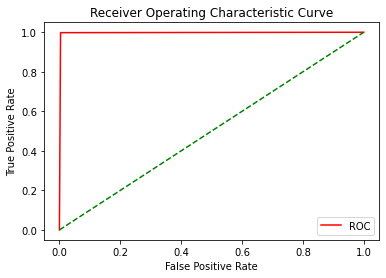

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    

prob = clf2.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)